# Advection algorithms

Illustrate solution of the advection equation $q_t + uq_x = 0$ where $u$ is constant.
Shows the upwind method on a square pulse.  

This code is condensed into a single function.  For more description of what is being done in this fuction you might want to first look at [Advection_Examples1.ipynb](Advection_Examples1.ipynb)

Figures are plotted during the time stepping and accumulated.  They can then be viewed as an animation using [ipywidgets](https://github.com/ipython/ipywidgets).

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
from __future__ import print_function

In [30]:
import ipywidgets

## Desired true solution

Define the true solution as a function of $(x,t)$.  It will depend on the advection velocity `u`.  
Note how the periodic boundary conditions are imposed.

Evaluating this function at $t=0$ will give the initial conditions below.

In [31]:
def qtrue(x,t,u):
    x0 = x - u*t   # trace back characteristic to time 0
    x0 = mod(x0, 1.)  # use periodic boundary conditions to map to [0,1]
    q = where(abs(x0-0.2) < 0.1,  3., 2.)   # piecewise constant with values 2 and 3
    return q

### Define function to test one case

This function also make a plot every `nplot` time steps and accumulate these in `figs`, which is returned from the function call.

In [32]:
def upwind(x,tfinal,nsteps,u,qtrue,nplot):
    
    # set initial data:
    q0 = qtrue(x,0.,u)

    # plot initial data:
    fig = figure()
    xfine = linspace(0,1,5000)   # fine grid for plotting true solution
    plot(xfine, qtrue(xfine,0.,u),'r-')
    title('Initial data')
    plot(x,q0,'bo')
    ylim(1,4)

    # Start accumulating figures
    # Will add more figures during time stepping
    figs = [fig]  
    close(fig)  # so it won't appear yet


    # extend to include 2 ghost cells on each side:
    qn_ext = hstack([0., 0., q0, 0., 0.])
    i1 = 2  # index of first interior cell
    imx = mx+1  # index of last interior cell

    for n in range(nsteps):

        # fill ghost cells for periodic BCs:
        qn_ext[i1-2] = qn_ext[imx-1]
        qn_ext[i1-1] = qn_ext[imx]
        qn_ext[imx+1] = qn_ext[i1]
        qn_ext[imx+2] = qn_ext[i1+1]

        qnp_ext = qn_ext.copy()  # make a copy, not a new pointer to old array

        for i in range(i1,imx+1):
            if u > 0:
                qnp_ext[i] = qn_ext[i] - udtdx * (qn_ext[i]-qn_ext[i-1])
            else:
                qnp_ext[i] = qn_ext[i] - udtdx * (qn_ext[i+1]-qn_ext[i])

        qn_ext = qnp_ext

        if mod(n,nplot) == 0:
            fig = figure()
            qn = qn_ext[i1:imx+1]
            plot(x,qn,'bo-')
            ylim(1,4)
            tn = n*dt
            plot(xfine, qtrue(xfine,tn,u),'r-')
            title('Time t = %g' % tfinal)
            figs.append(fig)
            close(fig)

    print("Took %i time steps and produced %i figures" % (nsteps,len(figs)))
    return figs

In [33]:
xlower = 0.
xupper = 1.
mx = 50
dx = float(xupper-xlower)/mx

# finite volume cell centers:
x = linspace(xlower+0.5*dx, xupper-0.5*dx, mx)
u = 1.

tfinal = 2.0
nsteps = 150
dt = float(tfinal)/nsteps
udtdx = u*dt/dx
cfl = abs(udtdx)
print("dx = %6.4f, dt = %6.4f, Courant number is cfl = %5.2f" % (dx,dt,cfl))

# Run the upwind method, which returns the set of figures, 
# plotting every nplot steps:
nplot = 2
figs = upwind(x,tfinal,nsteps,u,qtrue,nplot)

dx = 0.0200, dt = 0.0133, Courant number is cfl =  0.67
Took 150 time steps and produced 76 figures


### View the final figure returned:

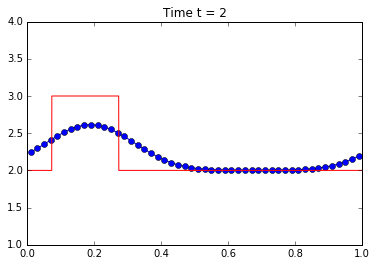

In [34]:
display(figs[-1])  # index -1 gives last element of array

### Make an animation using a widget:

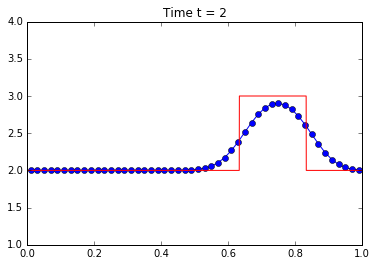

In [35]:
def display_frame(frameno): 
    display(figs[frameno])
    
widget = ipywidgets.IntSlider(min=0,max=len(figs)-1, value=0)
ipywidgets.interact(display_frame, frameno=widget)

### Try another case

Now we can more easily change the input parameters to re-run.  For example, increase the number of points but take the Courant number slightly larger than 1...

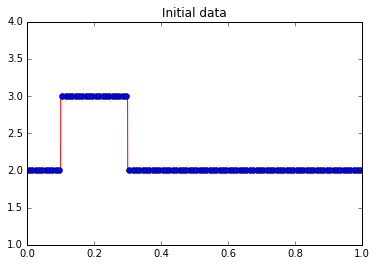

<function __main__.display_frame>

In [36]:
xlower = 0.
xupper = 1.
mx = 100
dx = float(xupper-xlower)/mx

# finite volume cell centers:
x = linspace(xlower+0.5*dx, xupper-0.5*dx, mx)
u = 1.

tfinal = 0.5
nsteps = 49
dt = float(tfinal)/nsteps
udtdx = u*dt/dx
cfl = abs(udtdx)
print("dx = %6.4f, dt = %6.4f, Courant number is cfl = %5.2f" % (dx,dt,cfl))

# Run the upwind method, which returns the set of figures, 
# plotting every nplot steps:

# Note: Call this output figs2 so it doesn't mess up interact above!

nplot = 1
figs2 = upwind(x,tfinal,nsteps,u,qtrue,nplot)

def display_frame(frameno): 
    display(figs2[frameno])
    
widget = ipywidgets.IntSlider(min=0,max=len(figs)-1, value=0)
ipywidgets.interact(display_frame, frameno=widget)